# Data Analysis
Data analysis for ECON672 Project   

In [1]:
%%capture
# Capture suppresses output to screen
import stata_setup
stata_setup.config("/Applications/Stata 17", "be")

In [2]:
%%stata
/* Define paths for data and output */
global data "Data"
global output "Output"
global processed "$data/Processed"

global finalSynthData "$processed/finalSynth.dta"


. /* Define paths for data and output */
. global data "Data"

. global output "Output"

. global processed "$data/Processed"

. 
. global finalSynthData "$processed/finalSynth.dta"

. 


In [3]:
%%capture
%%stata
log using "$output/analysisDid.log", replace

## Load the data

In [4]:
%%stata
use "$finalSynthData", clear
describe


. use "$finalSynthData", clear

. describe

Contains data from Data/Processed/finalSynth.dta
 Observations:           646                  
    Variables:            24                  5 Feb 2022 19:04
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            float   %10.0g                Year
employment      long    %10.0g                Annual Reported Employment (NAICS
                                                3364)
state           str2    %9s                   
annualPay       long    %10.0g                Average Annual Pay (USD) (NAICS
                                                3364)
lnEmployment    float   %9.0g                 
lnAnnualPay     float   %9.0g                 
unemploy        double  %10.0g                Annual state level unemploymen

In [5]:
%%stata
global covariates "lnPop lnUnemploy"
global waMo "(state=="WA" | state=="MO")"
global waCa "(state=="WA" | state=="CA")"


. global covariates "lnPop lnUnemploy"

. global waMo "(state=="WA" | state=="MO")"

. global waCa "(state=="WA" | state=="CA")"

. 


## Descriptive Statistics

In [6]:
%%stata
sort state year
summarize annualPay employment pop if $waMo


. sort state year

. summarize annualPay employment pop if $waMo

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
   annualPay |         38    94311.68    15963.63      63203     119650
  employment |         38    48908.84    34760.55      12552      96012
         pop |         38     6341492    554954.5    5641142    7614893

. 


## Check Parallel Trends

In [7]:
%%stata
global leads "t_lead4 t_lead3 t_lead2 t_lead1"
global lags "t_lag1 t_lag2 t_lag3 t_lag4"


. global leads "t_lead4 t_lead3 t_lead2 t_lead1"

. global lags "t_lag1 t_lag2 t_lag3 t_lag4"

. 


### Job Growth

### WA-MO Comparison


. reg lnEmployment ///
>     $leads t_0 $lags i.year i.wa ///
>     $covariates if $waMo, cluster(wa)
note: 2010.year omitted because of collinearity.
note: 2011.year omitted because of collinearity.
note: 2012.year omitted because of collinearity.
note: 2013.year omitted because of collinearity.
note: 2014.year omitted because of collinearity.
note: 2015.year omitted because of collinearity.
note: 2016.year omitted because of collinearity.
note: 2017.year omitted because of collinearity.
note: 2019.year omitted because of collinearity.

Linear regression                               Number of obs     =         38
                                                F(1, 1)           =          .
                                                Prob > F          =          .
                                                R-squared         =     0.9951
                                                Root MSE          =      .0909

                                     (Std. err. adjusted fo

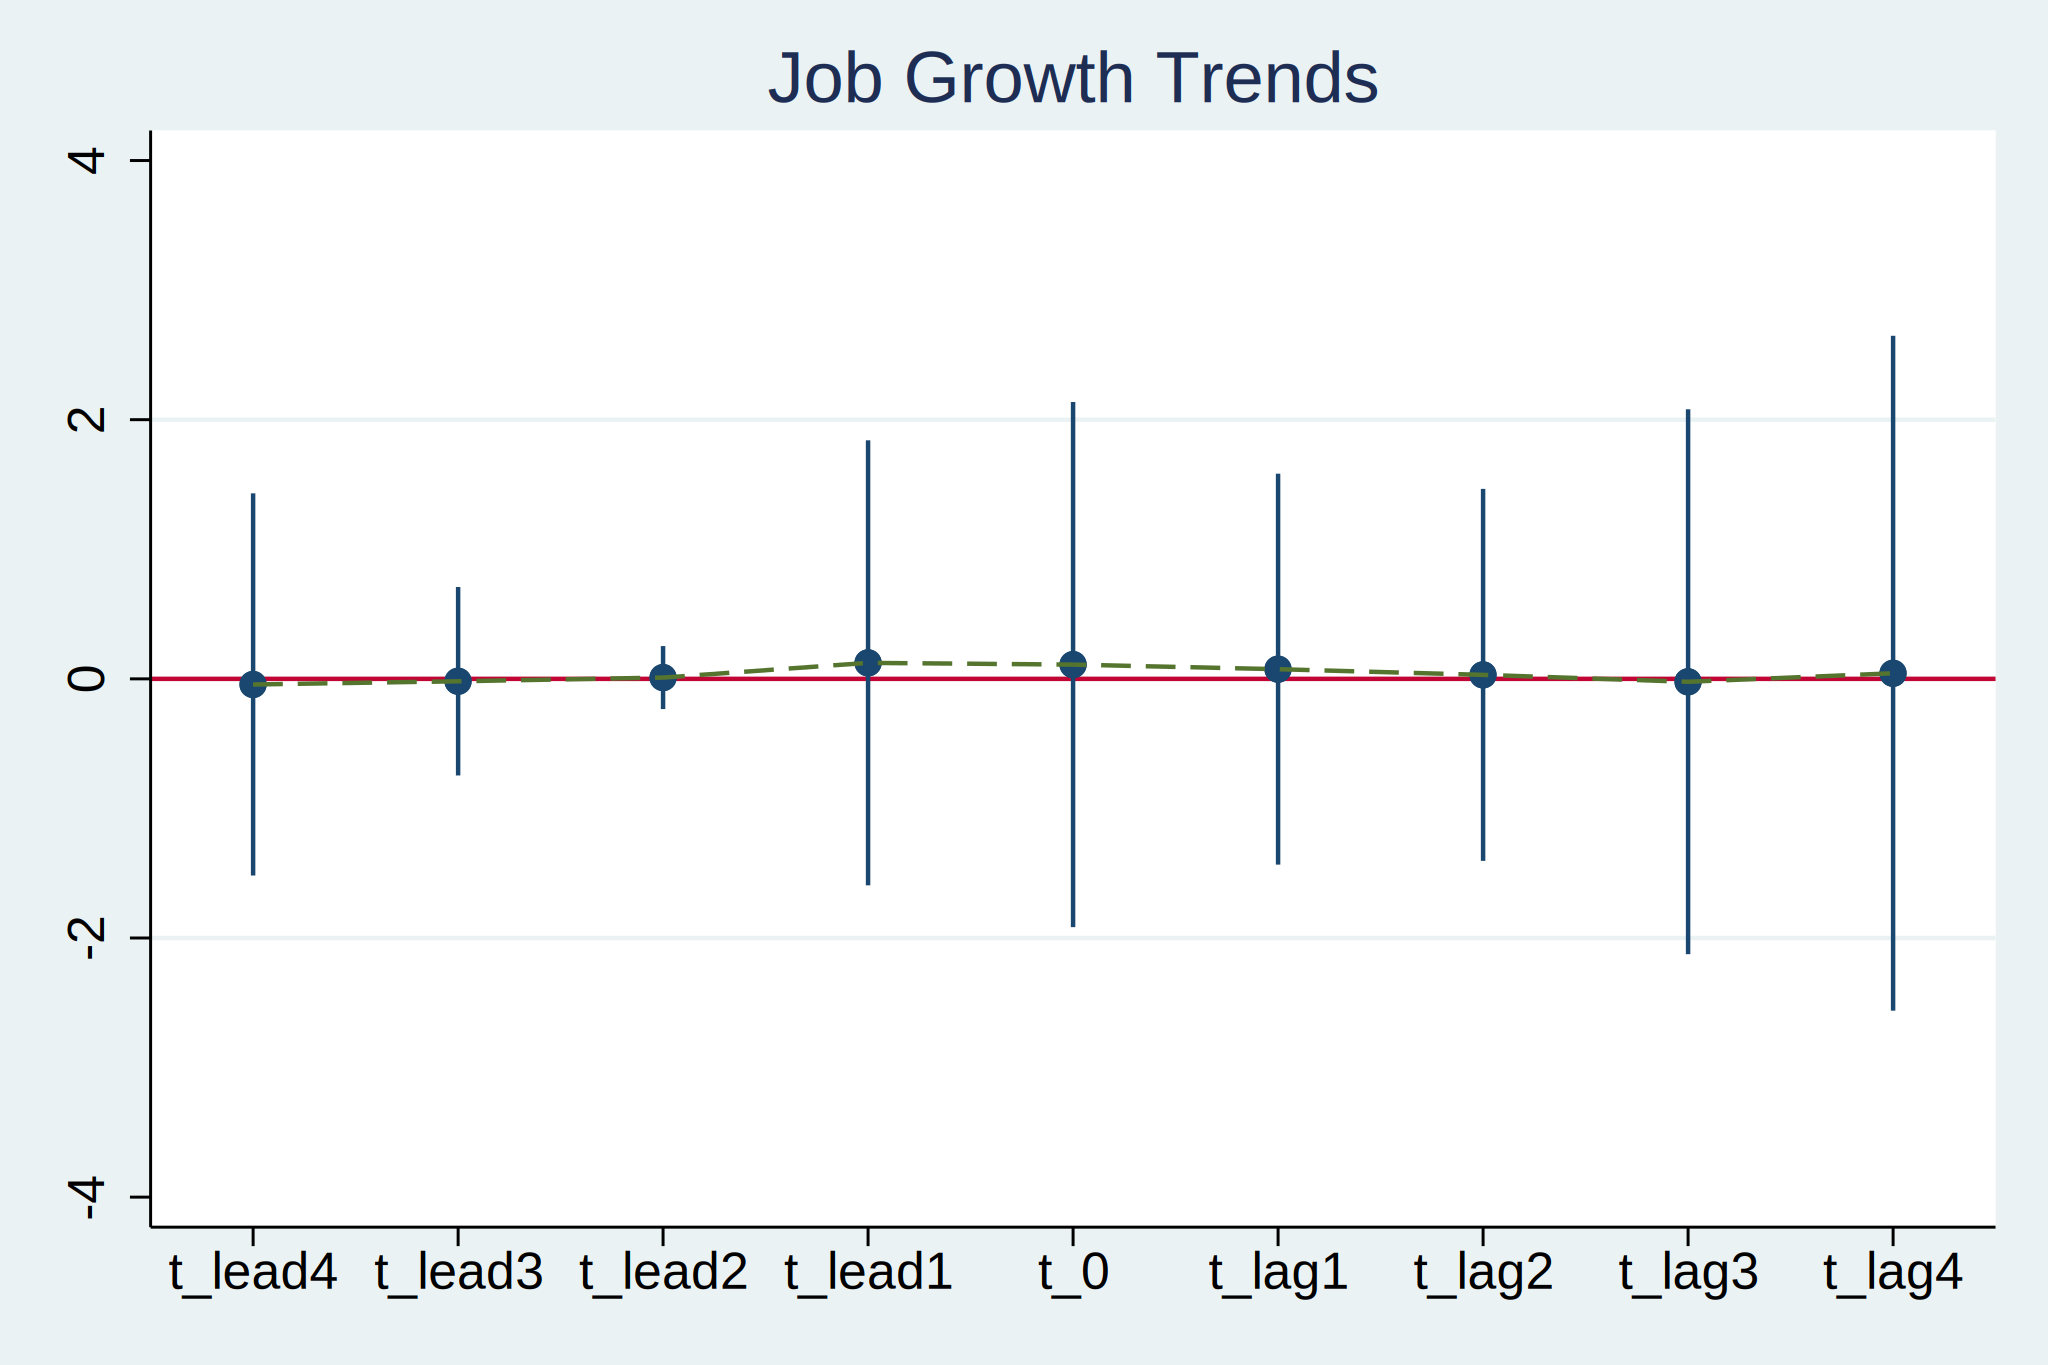

In [8]:
%%stata
reg lnEmployment ///
    $leads t_0 $lags i.year i.wa ///
    $covariates if $waMo, cluster(wa)
    
coefplot , keep($leads t_0 $lags ) ///
    vertical title(Job Growth Trends) ///
    yline(0) ///
    addplot(line @b @at,lpattern(dash))

### WA-CA Comparison


. reg lnEmployment ///
>     $leads t_0 $lags i.year i.wa ///
>     $covariates if $waCa, cluster(wa)
note: 2010.year omitted because of collinearity.
note: 2011.year omitted because of collinearity.
note: 2012.year omitted because of collinearity.
note: 2013.year omitted because of collinearity.
note: 2014.year omitted because of collinearity.
note: 2015.year omitted because of collinearity.
note: 2016.year omitted because of collinearity.
note: 2017.year omitted because of collinearity.
note: 2019.year omitted because of collinearity.

Linear regression                               Number of obs     =         38
                                                F(1, 1)           =          .
                                                Prob > F          =          .
                                                R-squared         =     0.9144
                                                Root MSE          =     .04944

                                     (Std. err. adjusted fo

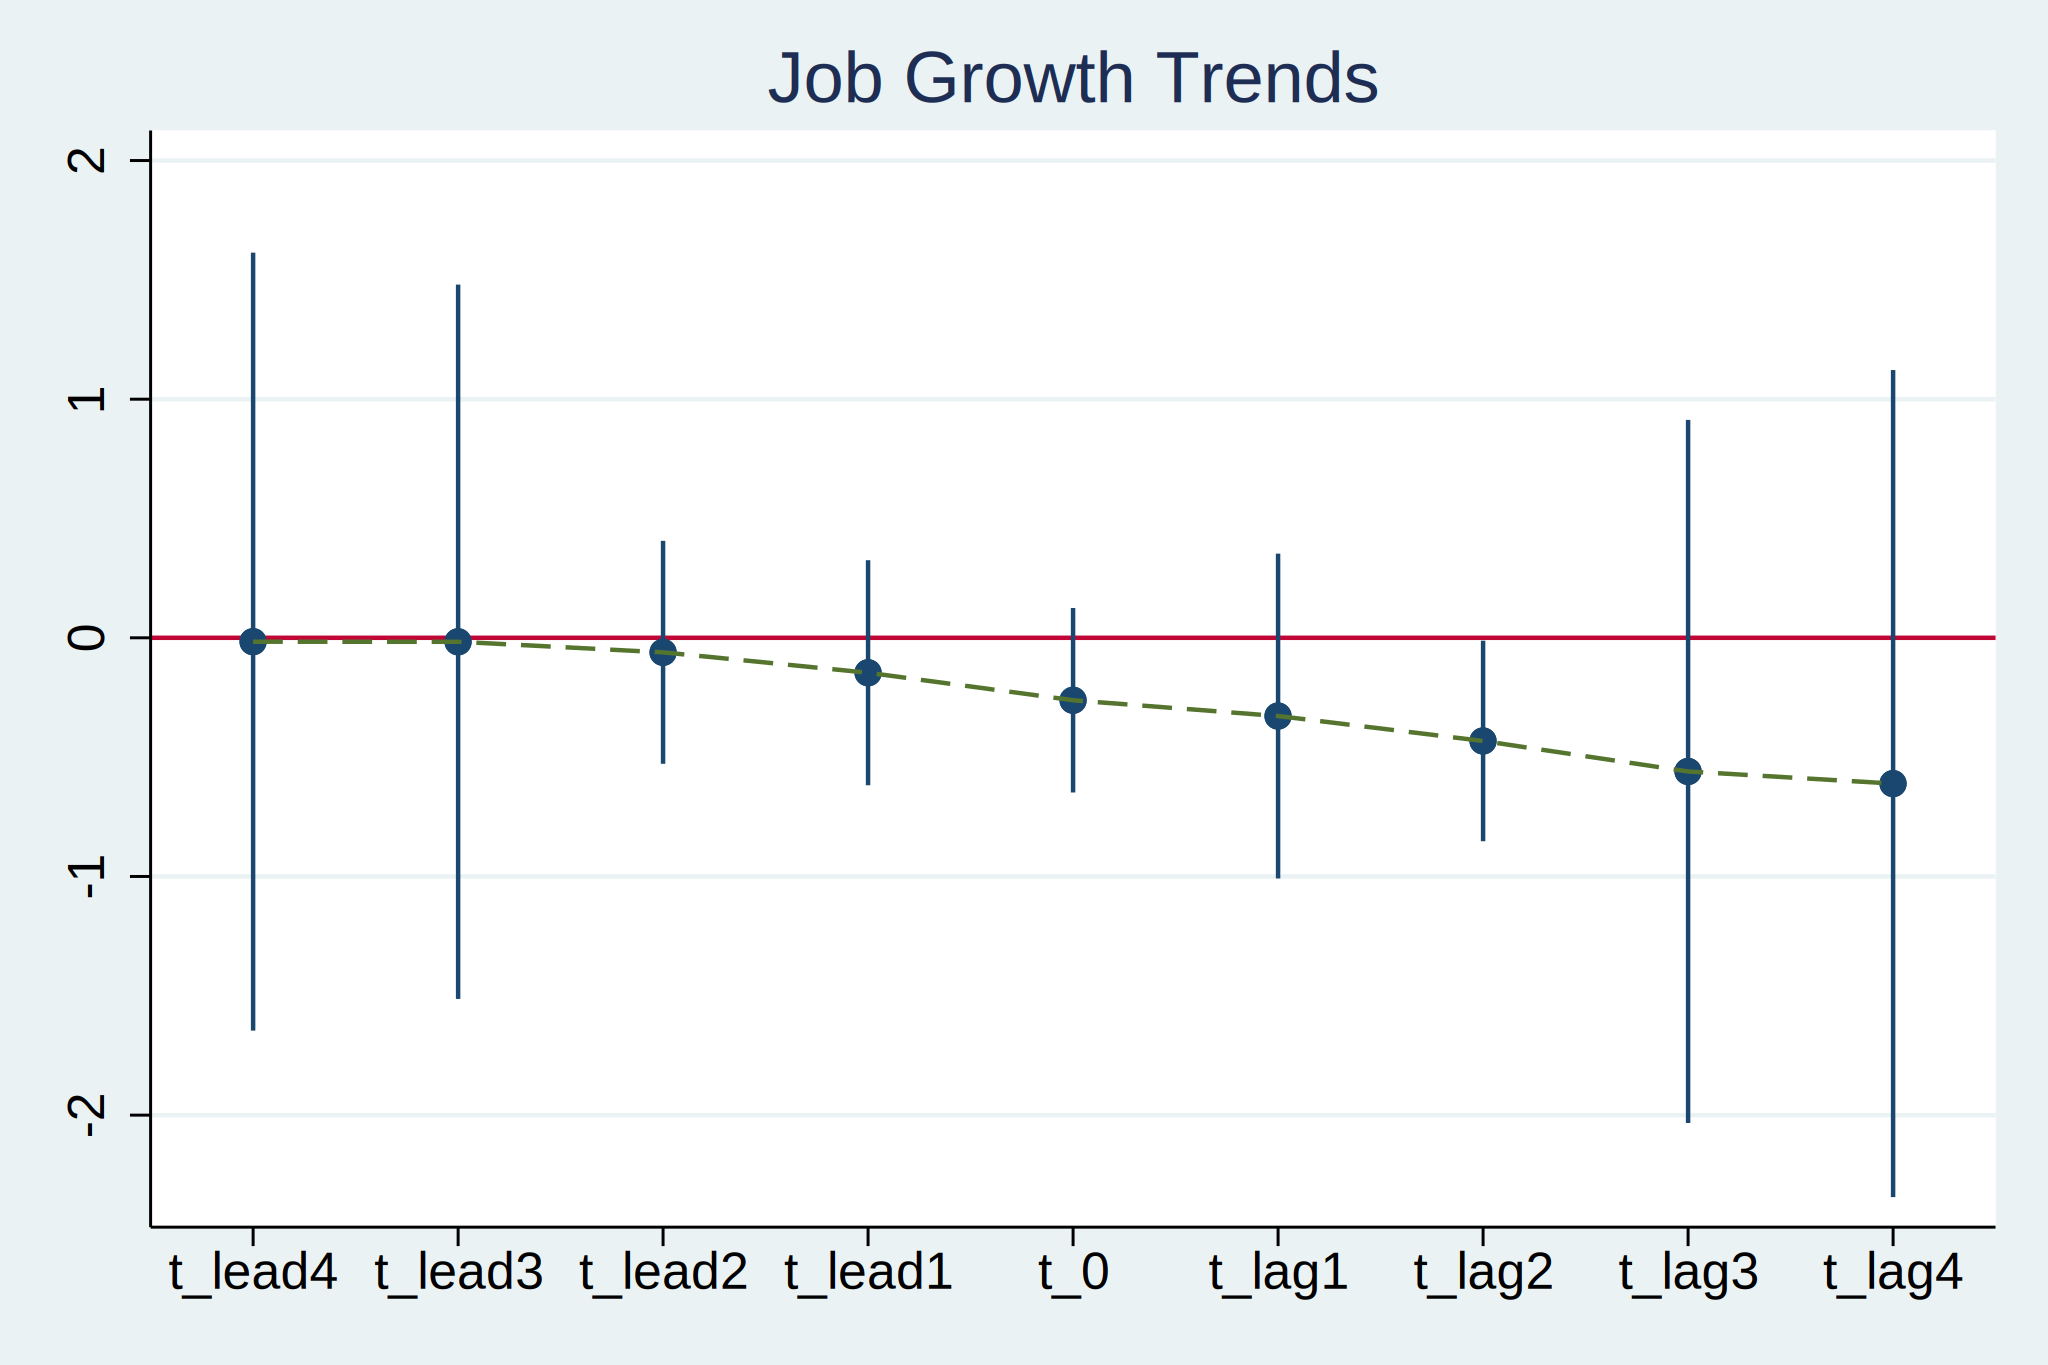

In [9]:
%%stata
reg lnEmployment ///
    $leads t_0 $lags i.year i.wa ///
    $covariates if $waCa, cluster(wa)
    
coefplot , keep($leads t_0 $lags ) ///
    vertical title(Job Growth Trends) ///
    yline(0) ///
    addplot(line @b @at,lpattern(dash))

### Wage growth

### WA-MO Comparison


. reg lnAnnualPay ///
>     $leads t_0 $lags i.year i.wa ///
>     $covariates if $waMo, cluster(wa)
note: 2010.year omitted because of collinearity.
note: 2011.year omitted because of collinearity.
note: 2012.year omitted because of collinearity.
note: 2013.year omitted because of collinearity.
note: 2014.year omitted because of collinearity.
note: 2015.year omitted because of collinearity.
note: 2016.year omitted because of collinearity.
note: 2017.year omitted because of collinearity.
note: 2019.year omitted because of collinearity.

Linear regression                               Number of obs     =         38
                                                F(1, 1)           =          .
                                                Prob > F          =          .
                                                R-squared         =     0.9941
                                                Root MSE          =     .02039

                                     (Std. err. adjusted for

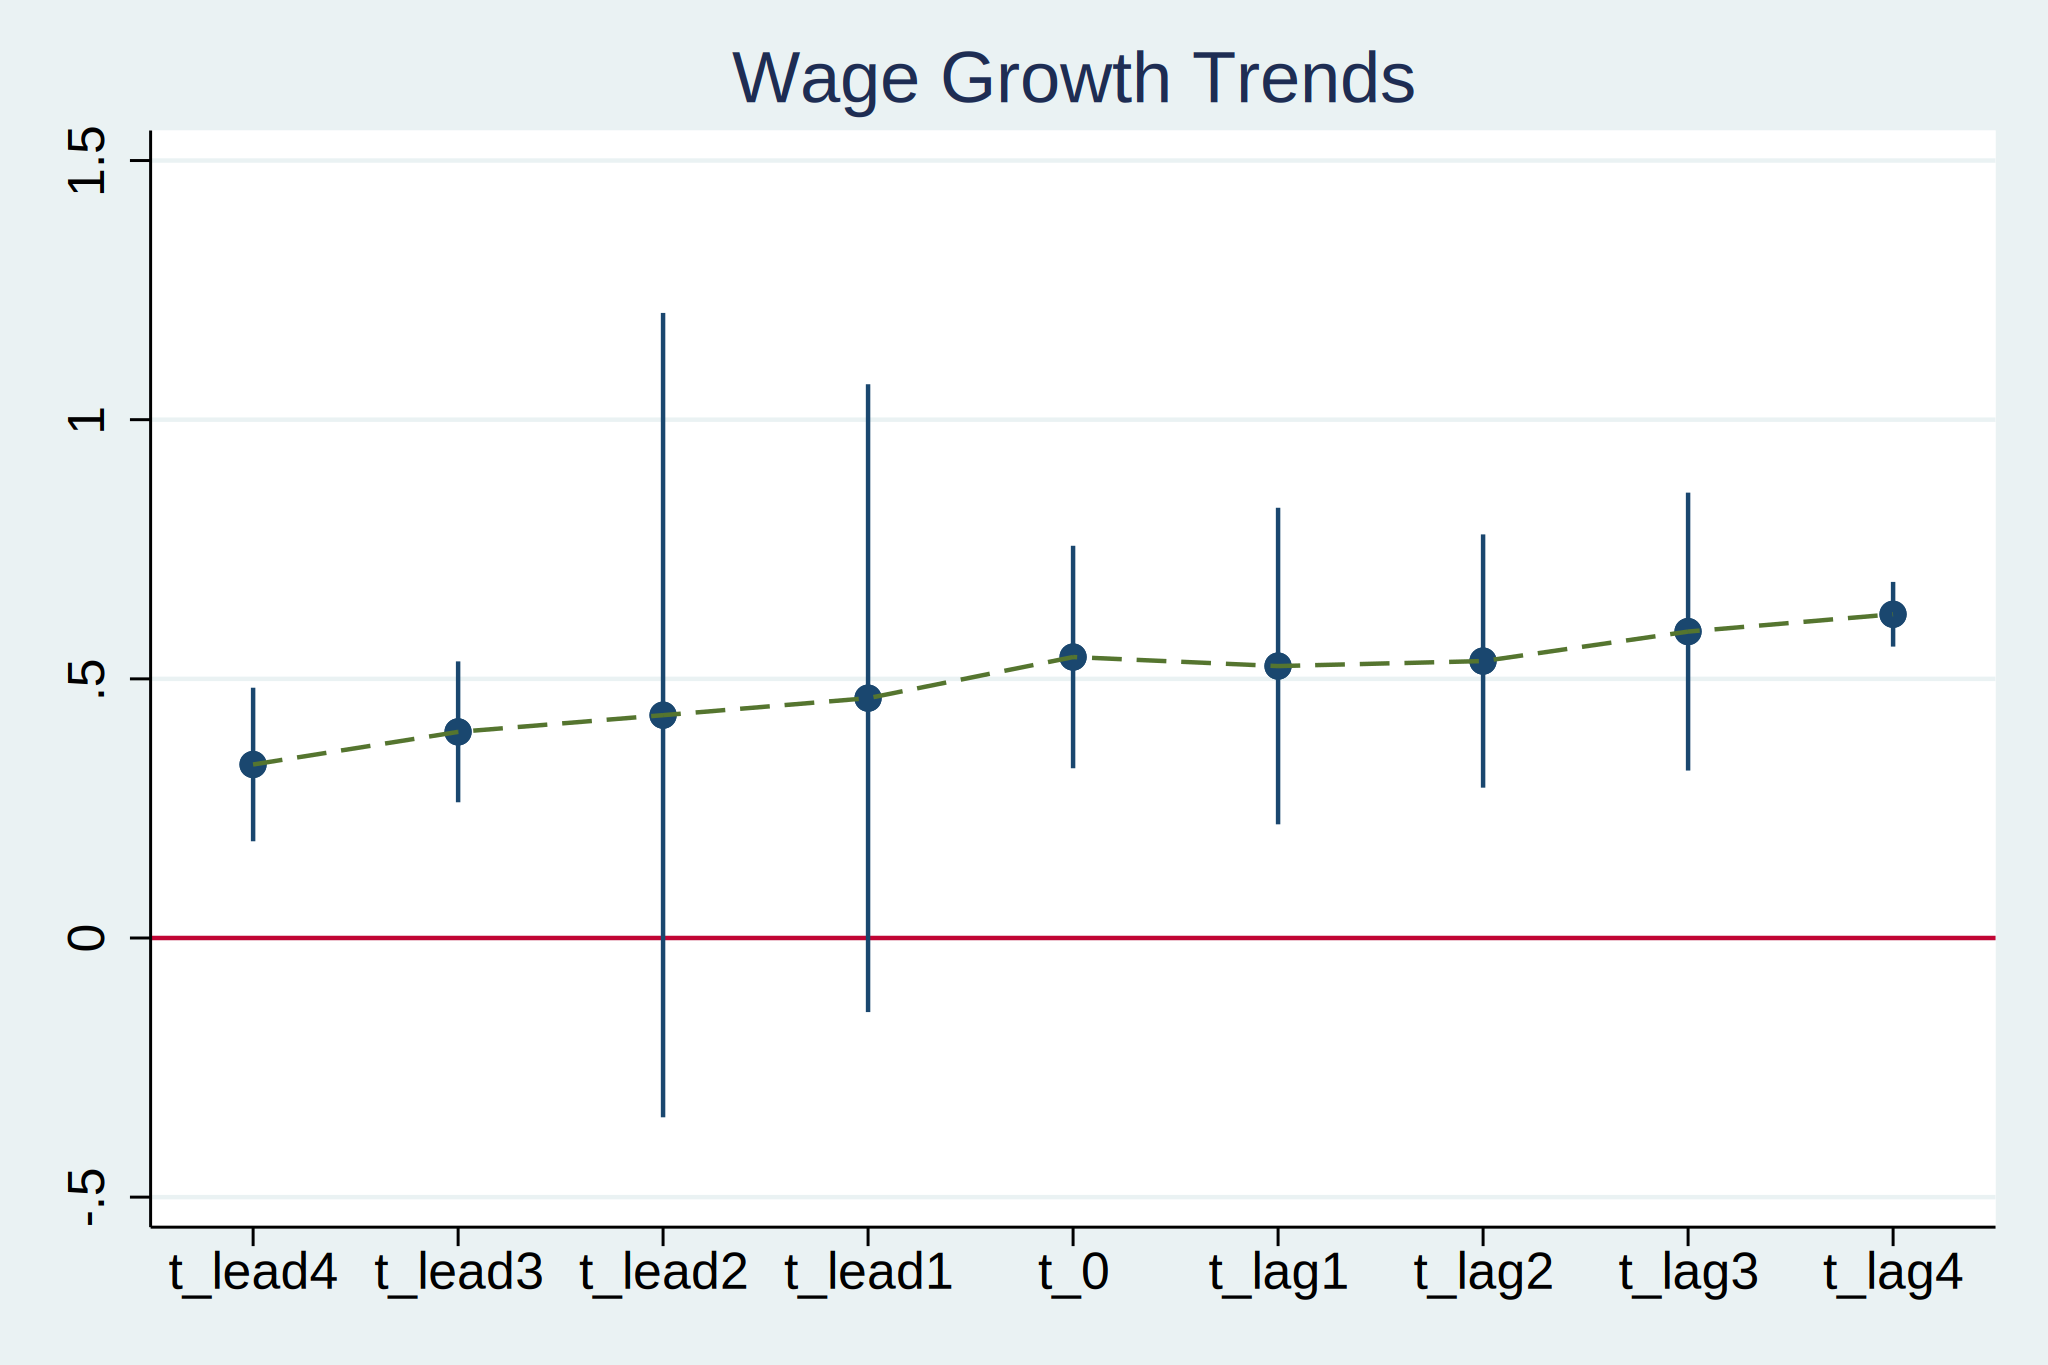

In [10]:
%%stata
reg lnAnnualPay ///
    $leads t_0 $lags i.year i.wa ///
    $covariates if $waMo, cluster(wa)
    
coefplot , keep($leads t_0 $lags ) ///
    vertical title(Wage Growth Trends) ///
    yline(0) ///
    addplot(line @b @at,lpattern(dash))

### WA-CA Comparison


. reg lnAnnualPay ///
>     $leads t_0 $lags i.year i.wa ///
>     $covariates if $waCa, cluster(wa)
note: 2010.year omitted because of collinearity.
note: 2011.year omitted because of collinearity.
note: 2012.year omitted because of collinearity.
note: 2013.year omitted because of collinearity.
note: 2014.year omitted because of collinearity.
note: 2015.year omitted because of collinearity.
note: 2016.year omitted because of collinearity.
note: 2017.year omitted because of collinearity.
note: 2019.year omitted because of collinearity.

Linear regression                               Number of obs     =         38
                                                F(1, 1)           =          .
                                                Prob > F          =          .
                                                R-squared         =     0.9949
                                                Root MSE          =     .01822

                                     (Std. err. adjusted for

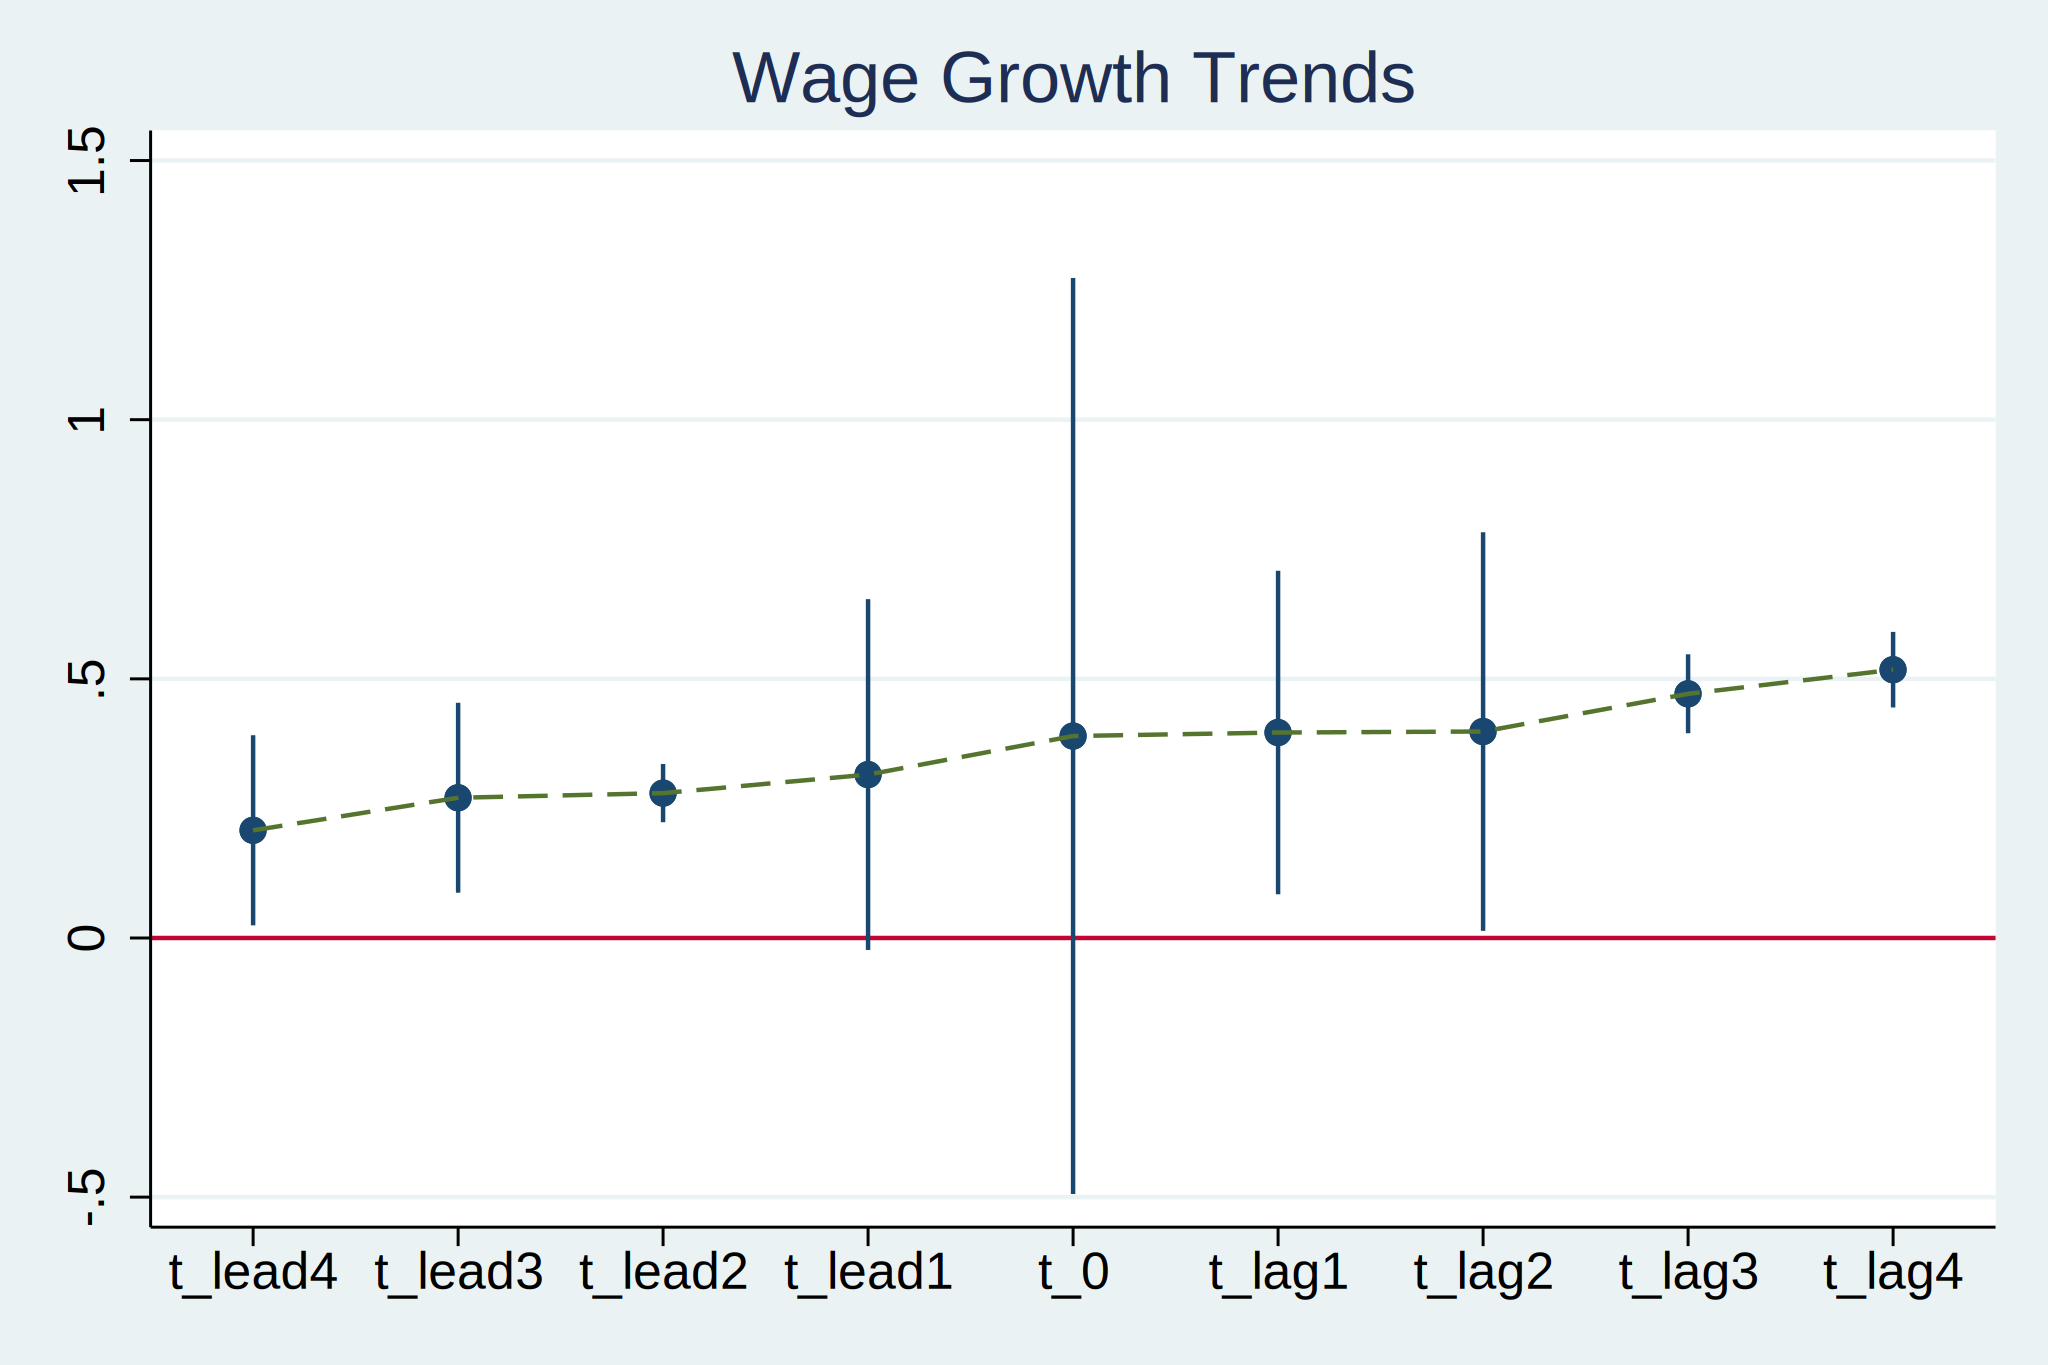

In [11]:
%%stata
reg lnAnnualPay ///
    $leads t_0 $lags i.year i.wa ///
    $covariates if $waCa, cluster(wa)
    
coefplot , keep($leads t_0 $lags ) ///
    vertical title(Wage Growth Trends) ///
    yline(0) ///
    addplot(line @b @at,lpattern(dash))

## Basic Model

In [12]:
%%stata
// Job Growth DID Model
reg lnEmployment ///
    i.wa postIncentive treated ///
    if $waMo, robust
    
eststo employmentRegBasic

reg lnEmployment ///
    i.wa postIncentive treated ///
    $covariates if $waMo, robust
    
eststo employmentRegCovariates


// Wages DID Model
reg lnAnnualPay ///
    i.wa postIncentive treated ///
    if $waMo, robust
    
eststo wagesRegBasic

reg lnAnnualPay ///
    i.wa postIncentive treated ///
    $covariates if $waMo, robust
    
eststo wagesRegCovariates


. // Job Growth DID Model
. reg lnEmployment ///
>     i.wa postIncentive treated ///
>     if $waMo, robust

Linear regression                               Number of obs     =         38
                                                F(3, 34)          =    1824.33
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9875
                                                Root MSE          =     .09988

------------------------------------------------------------------------------
             |               Robust
lnEmployment | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        1.wa |   1.676524   .0456306    36.74   0.000     1.583792    1.769257
postIncent~e |   .1231911   .0297135     4.15   0.000     .0628061    .1835761
     treated |    .000811   .0532653     0.02   0.988     -.10

In [13]:
%%stata
/* Results */
esttab employmentRegBasic employmentRegCovariates ///
    wagesRegBasic wagesRegCovariates, ///
    noconstant se ar2 obslast scalars(F) ///
    keep(1.wa treated lnPop lnUnemploy)  ///
    order(treated 1.wa lnPop) ///
    coeflabels(treated "DID ATT" ///
               1.wa "Washington State" ///
               lnPop "ln(population)" ///
               lnUnemploy "ln(Unemployment Rate)")


. /* Results */
. esttab employmentRegBasic employmentRegCovariates ///
>     wagesRegBasic wagesRegCovariates, ///
>     noconstant se ar2 obslast scalars(F) ///
>     keep(1.wa treated lnPop lnUnemploy)  ///
>     order(treated 1.wa lnPop) ///
>     coeflabels(treated "DID ATT" ///
>                1.wa "Washington State" ///
>                lnPop "ln(population)" ///
>                lnUnemploy "ln(Unemployment Rate)")

----------------------------------------------------------------------------
                      (1)             (2)             (3)             (4)   
             lnEmployment    lnEmployment     lnAnnualPay     lnAnnualPay   
----------------------------------------------------------------------------
DID ATT          0.000811          -0.126         0.00768          -0.240***
                 (0.0533)        (0.0620)        (0.0597)        (0.0488)   

Washington~e        1.677***        1.542***     -0.00701          -0.273***
                 (0.0456)      

In [14]:
%%stata
/* Results */
esttab employmentRegBasic employmentRegCovariates ///
    wagesRegBasic wagesRegCovariates ///
    using $output/regTable.tex, replace ///
    noconstant se ar2 obslast scalars(F) ///
    keep(1.wa treated lnPop)  ///
    order(treated 1.wa lnPop) ///
    mtitles("ln(employment)" "(1)+X" "ln(wages)" "(3)+X") ///
    coeflabels(treated "DID ATT" ///
               1.wa "Washington State" ///
               lnPop "ln(population)")


. /* Results */
. esttab employmentRegBasic employmentRegCovariates ///
>     wagesRegBasic wagesRegCovariates ///
>     using $output/regTable.tex, replace ///
>     noconstant se ar2 obslast scalars(F) ///
>     keep(1.wa treated lnPop)  ///
>     order(treated 1.wa lnPop) ///
>     mtitles("ln(employment)" "(1)+X" "ln(wages)" "(3)+X") ///
>     coeflabels(treated "DID ATT" ///
>                1.wa "Washington State" ///
>                lnPop "ln(population)")
(output written to Output/regTable.tex)

. 


In [15]:
%%capture
%%stata
clear
log close